# PyTorch & Tensor

In [1]:
# loading packages
import matplotlib.pyplot as plt
import numpy as np
import torch
print(" torch: {} \n numpy: {}".format(torch.__version__, np.__version__))
print(" Use GPU? {}".format(torch.cuda.is_available()))

 torch: 1.8.0 
 numpy: 1.20.2
 Use GPU? True


# How to create a Tensor?

In [2]:
# create from list
x_list = [[1, 2, 3], [4, 5, 6]]
x = torch.Tensor(x_list)
print(x)

# create from numpy array(2 by 3)
x_numpy = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.Tensor(x_numpy)
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
# back to list / numpy

# .tolist()
x_back2list = x.tolist()
print(type(x_back2list))

# .numpy()
x_back2numpy = x.numpy()
print(type(x_back2numpy))

<class 'list'>
<class 'numpy.ndarray'>


In [4]:
# device of tensor x
print("Tensor `x` device:", x.device)

device = 'cuda'
# use GPU
x = x.to(device)
print("after change the device, Tensor `x` device:", x.device)

device = 'cpu'
# CPU 사용
x = x.to(device)
print("after change the device, Tensor `x` device:", x.device)

Tensor `x` device: cpu
after change the device, Tensor `x` device: cuda:0
after change the device, Tensor `x` device: cpu


### create zero or one tensor like `x`

* `torch.zeros_like`: create tensor filled with 0 like x with same shape, data type and device 
* `torch.ones_like`: create tensor filled with 1 just like x with same shape, data type and device 

In [5]:
x_zeros = torch.zeros_like(x)
print(x_zeros.device)
print(x_zeros)

cpu
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Type of Tensor

- `.type()`

In [6]:
# float type tensor
a = torch.FloatTensor(np.array([[1, 2, 3], 
                                [4, 5, 6]]))

# integer type tensor
b = torch.LongTensor(np.array([[1, 2, 3], 
                               [4, 5, 6]]))

# 8 bit integer type tensor
c = torch.ByteTensor([1, 0, 1, 0])

# boolean type tensor
d = torch.BoolTensor([True, False, True, True])

for tensor in [a, b, c, d]:
    print(f"tensor type: {tensor.type()}")
    print(f"{tensor}\n")

tensor type: torch.FloatTensor
tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor type: torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6]])

tensor type: torch.ByteTensor
tensor([1, 0, 1, 0], dtype=torch.uint8)

tensor type: torch.BoolTensor
tensor([ True, False,  True,  True])



## Tensor Manipulation

<img src="http://drive.google.com/uc?export=view&id=1iYSUeya5LD4EtDg6Avu8QlvM2ByZbOp-" width="480px" height="480px" >

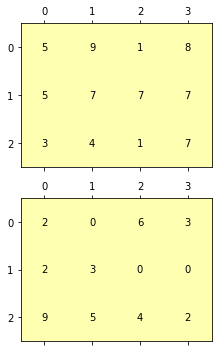

In [10]:
def draw_tensor(tensor, x):
    """tensor drawing"""
    fig, axes = plt.subplots(len(tensor), 1, figsize=(5, 5))
    for k in range(len(tensor)):
        axes[k].matshow(tensor.numpy()[k], vmin=0, vmax=1, cmap='summer', alpha=0.5)
        for (i, j), z in np.ndenumerate(x.numpy()[k]):
            axes[k].text(j, i, '{:d}'.format(z), ha='center', va='center')
    plt.tight_layout()
    plt.show()
    
# 예시 텐서
torch.manual_seed(777)
x = torch.randint(0, 10, size=(2, 3, 4))
mask = torch.ones_like(x)
draw_tensor(mask, x)

### view

usually use this when changing a tensor to a right size

torch.Size([2, 2, 6])


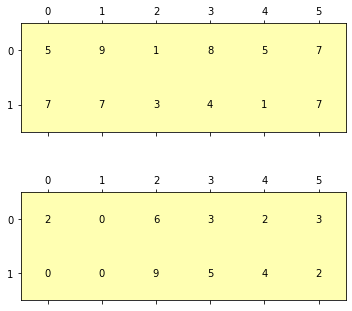

In [9]:
# 크기가 (2, 3, 4) 3차원 텐서를 (2, 2, 6) 으로 변경
x_viewed1 = x.view(2, 2, 6)

# 텐서 시각화
print(x_viewed1.size())
mask = torch.ones_like(x_viewed1)
draw_tensor(mask, x_viewed1)

In [ ]:
# 크기가 (2, 3, 4) 3차원 텐서를 (2, 1, 12) 으로 변경
x_viewed2 = x.view(-1, 1, 12)

# 텐서 시각화
print(x_viewed2.size())
mask = torch.ones_like(x_viewed2)
draw_tensor(mask, x_viewed2)

### permute

torch.Size([4, 3, 2])


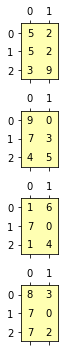

In [11]:
# (2, 3, 4) 크기 텐서의 차원 크기를 (4, 3, 2)로 바꾼다.
x_permuted = x.permute(2, 1, 0)

# 텐서 시각화
print(x_permuted.size())
mask = torch.ones_like(x_permuted)
draw_tensor(mask, x_permuted)

## squeeze & unsqueeze

* squeeze: 텐서의 크기가 1인 차원을 지워버린다. 숫자를 특정하면 해당 차원의 크기가 1일 경우 지우고 아니면 그냥 둔다.
* unsqueeze: 해당하는 숫자 차원에 크기 1인 차원을 늘린다. `np.newaxis` 와 비슷한 역할

In [12]:
# 크기가 (2, 1, 3, 4, 1) 인 5차원 텐서를 생성한다
x = torch.rand((2, 1, 3, 4, 1))  

# 모든 차원에서 크기가 1인 차원을 squeeze 한다.
print(x.squeeze().size())  # 크기확인

# 두번째 차원(크기 = 1)을 squeeze 한다.
print(x.squeeze(1).size())  # 크기확인

# 4번째 차원에 크기를 1 추가, 6차원 텐서가 된다.
print(x.unsqueeze(3).size())  # 크기확인

torch.Size([2, 3, 4])
torch.Size([2, 3, 4, 1])
torch.Size([2, 1, 3, 1, 4, 1])


### cat & stack

두 텐서 혹은 그 이상을 합치는 역할을 담당한다.

In [ ]:
def draw_tensor2(x):
    """tensor drawing cat&stack"""
    subplot_size = 1 if x.ndimension() <= 2 else x.size(0)
    fig, axes = plt.subplots(subplot_size, 1)
    if subplot_size == 1: 
        axes.matshow(x.numpy(), vmin=0, vmax=1, cmap='summer')
    else:
        for i in range(subplot_size):
            axes[i].matshow(x.numpy()[i], vmin=0, vmax=1, cmap='summer')
    plt.show()

In [ ]:
torch.manual_seed(777)
# 크기가 (2, 3) 인 A, B 텐서를 만든다
A = torch.rand((2, 3))
B = torch.rand((2, 3))

# 첫번째 차원을 기준으로 텐서를 concatenate 한다.
AB_cated = torch.cat([A, B], dim=0)
print(AB_cated)

# 시각화
draw_tensor2(AB_cated)

In [ ]:
# 첫번째 차원을 기준으로 텐서를 stack 한다.
AB_stacked = torch.stack([A, B], dim=0)
print("torch.stack([A, B], dim=0)\n")
print(AB_stacked)
print("----"*10)
print("torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)\n")
# 각 텐서를 첫번째 차원 기준으로 unsqueeze 후, cat 한것과 같은 결과
AB_unsqueeze_cat = torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)
print(AB_unsqueeze_cat)

# 시각화
draw_tensor2(AB_stacked)

---

# Perceptron

In [19]:
x.int()

tensor([1, 1], dtype=torch.int32)

In [20]:
def activation(x):
    return (x > 0).int()

# AND 게이트 함수 정의
def AND(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# NAND 게이트 함수 정의
def NAND(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# AND 게이트 함수 정의
def OR(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# 각 게이트에 알맞는 w, b 가중치 생성
w_and = torch.FloatTensor([0.5, 0.5])  
b_and = torch.FloatTensor([-0.7])
w_nand = torch.FloatTensor([-0.5, -0.5])  
b_nand = torch.FloatTensor([0.7])
w_or = torch.FloatTensor([0.5, 0.5]) 
b_or = torch.FloatTensor([-0.2])

# 입력 텐서를 만들어 결과 확인
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
for x in X:
    print(f"input : {x.long().tolist()}")
    print(" - AND:", AND(x, w=w_and, b=b_and).item())
    print(" - NAND:", NAND(x, w=w_nand, b=b_nand).item())
    print(" - OR:", OR(x, w=w_or, b=b_or).item())
    print("--"*15)

input : [0, 0]
 - AND: 0
 - NAND: 1
 - OR: 0
------------------------------
input : [0, 1]
 - AND: 0
 - NAND: 1
 - OR: 1
------------------------------
input : [1, 0]
 - AND: 0
 - NAND: 1
 - OR: 1
------------------------------
input : [1, 1]
 - AND: 1
 - NAND: 0
 - OR: 1
------------------------------


## 다른 관점에서 퍼셉트론 이해하기

직관적인 그림으로 지금까지 소개한 AND, NAND, OR 게이트들을 이해해보자. 사실 이 모든 게이트들은 평면상에서 하나의 선으로 2종류의 점들을 분류하는 것과 같은 문제다. 

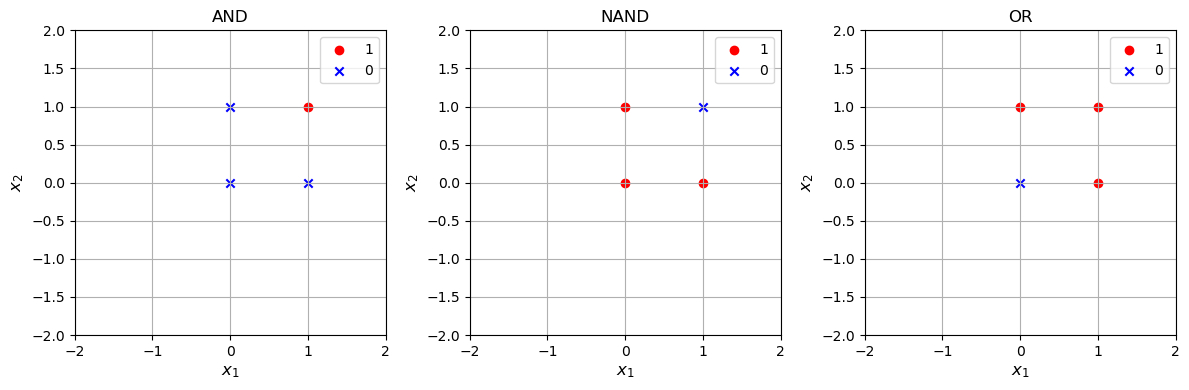

In [21]:
def plot_dots(ax, gate_func):
    x = [(0, 0), (1, 0), (0, 1), (1, 1)]
    if (gate_func.__name__ == "AND"):
        marker_o = list(zip(*x[3:]))
        marker_x = list(zip(*x[:3]))
    elif (gate_func.__name__ == "NAND"):
        marker_o = list(zip(*x[:3]))
        marker_x = list(zip(*x[3:]))
    elif (gate_func.__name__ == "OR"):
        marker_o = list(zip(*x[1:]))
        marker_x = list(zip(*x[:1]))
    elif (gate_func.__name__ == "XOR"):
        marker_o = list(zip(*x[1:3]))
        marker_x = list(zip(*x[::3]))
    else:
        return "gate_func error"
    
    ax.scatter(marker_o[0], marker_o[1], c='r', marker='o', label='1')
    ax.scatter(marker_x[0], marker_x[1], c='b', marker='x', label='0')
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_title(gate_func.__name__)
    ax.grid()
    ax.set_xlabel("$x_1$", fontsize=12)
    ax.set_ylabel("$x_2$", fontsize=12)
    
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func in zip(axes, [AND, NAND, OR]):
    plot_dots(ax=ax, gate_func=func)
plt.tight_layout()
plt.show()

C:\Users\simon\miniconda3\envs\pyenv\lib\site-packages\numpy\core\_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\simon\miniconda3\envs\pyenv\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, su

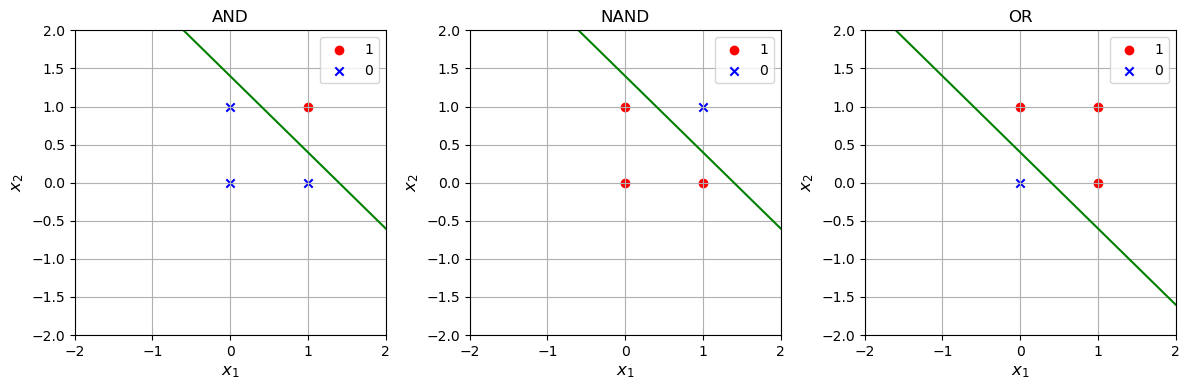

In [22]:
def plot_line(**kwargs):
    """x2 = (-w1*x1 - b) / w2"""
    x1 = [-2, 2]
    w = kwargs['w']
    b = kwargs['b']
    get_x2 = lambda x: (-w[0]*x - b) / w[1]
    # plot
    ax=kwargs['ax']
    ax.plot(x1, [get_x2(x1[0]), get_x2(x1[1])], c='g')

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func, (w, b) in zip(axes, [AND, NAND, OR], [(w_and, b_and), (w_nand, b_nand), (w_or, b_or)]):
    plot_dots(ax=ax, gate_func=func)
    plot_line(ax=ax, w=w, b=b)
plt.tight_layout()
plt.show()

## XOR 문제

In [ ]:
def XOR():
    """empty function"""
    pass

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=80)
plot_dots(ax=ax, gate_func=XOR)
plt.tight_layout()
plt.show()

In [ ]:
def solution(x, **kwargs):
    # 새로운 층
    s1 = NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand'])
    s2 = OR(x, w=kwargs['w_or'], b=kwargs['b_or'])
    # 출력 층: s1 과 s2 를 새로운 입력으로 구성하여 전달
    y = AND(torch.Tensor([s1, s2]), w=kwargs['w_and'], b=kwargs['b_and'])
    return y

# 입력 텐서와 타겟 텐서를 생성
input_data = torch.FloatTensor([[0, 0], [1, 0], [0, 1], [1, 1]])
target_data = torch.FloatTensor([0, 1, 1, 0])

# 이전에 사용한 가중치를 dictionary 타입으로 만든다.
kwargs = dict([('w_nand', w_nand), ('b_nand', b_nand), 
               ('w_or', w_or), ('b_or', b_or), 
               ('w_and', w_and), ('b_and', b_and)])

# 테스트
for x, y in zip(input_data, target_data):
    pred = solution(x, **kwargs)
    print(f"predict: {pred.item()} | target: {y.byte().item()}")

In [ ]:
def draw_solution(x, w, b, ax, func):
    s = func(x, w=w, b=b).item()
    marker_shape = 'o' if s == 1 else 'x'
    marker_color = 'r' if s == 1 else 'b'
    ax.scatter(x.numpy()[0], x.numpy()[1], c=marker_color, marker=marker_shape, label='{}: {}'.format(func.__name__, s))
    plot_line(ax=ax, w=w, b=b)
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid()
    ax.set_title('[{}] input: {} > result: {}'.format(func.__name__, x.long().numpy(), s))
    
def draw_solution_by_step(x, **kwargs):
    NAND = kwargs['f_nand']
    OR = kwargs['f_or']
    AND = kwargs['f_and']
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
    s = torch.FloatTensor([NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand']), 
                           OR(x, w=kwargs['w_or'], b=kwargs['b_or'])])
    draw_solution(x, w=kwargs['w_nand'], b=kwargs['b_nand'], ax=axes[0], func=NAND)
    draw_solution(x, w=kwargs['w_or'], b=kwargs['b_or'], ax=axes[1], func=OR)
    draw_solution(s, w=kwargs['w_and'], b=kwargs['b_and'], ax=axes[2], func=AND)

x = torch.FloatTensor([1, 1])
kwargs.setdefault('f_nand', NAND)
kwargs.setdefault('f_or', OR)
kwargs.setdefault('f_and', AND)
draw_solution_by_step(x, **kwargs)

In [ ]:
def draw_gate_area():
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
    get_x2 = lambda x, w, b: (-w[0]*x - b) / w[1]
    w_nand, b_nand = [-0.5, -0.5], 0.7
    w_or, b_or = [0.5, 0.5], -0.2
    xx = torch.linspace(-2, 2)
    y_nand = get_x2(xx, w=w_nand, b=b_nand)
    y_or = get_x2(xx, w=w_or, b=b_or)
    ax.fill_between(xx.numpy(), y_nand.numpy(), y_or.numpy(), facecolor='g', alpha=0.3)
    plot_dots(ax=ax, gate_func=XOR)
    plot_line(ax=ax,  w=w_nand, b=b_nand)
    plot_line(ax=ax,  w=w_or, b=b_or)
    plt.tight_layout()
    plt.show()

In [ ]:
draw_gate_area()

---

# Deep Neural Network

## 

* NN 선언
training
validation

In [2]:
import torch
import torch.nn as nn

In [ ]:
torch.manual_seed(70)

device = "cuda" if torch.cuda.is_available() else "cpu"  # gpu 사용 여부
n_step = 10000  # 총 학습 스텝

# Data 세트 만들기
inputs = torch.FloatTensor([[0, 0], [1, 0], [0, 1], [1, 1]])
targets = torch.LongTensor([0, 1, 1, 0])

# 모델 생성: gpu를 사용하려면 모델에도 device를 전달해준다.
model = XOR().to(device)
# 손실함수 정의
loss_function = nn.CrossEntropyLoss()
# 옵티마이저 정의
optimizer = optim.SGD(model.parameters(), lr=0.7)

# GPU를 사용하려면 입력 텐서에도 device를 전달해준다.
inputs, targets = inputs.to(device), targets.to(device)

best_loss = 999
# n_step 동안 학습을 진행한다.
for step in range(n_step):
    # -- 훈련단계 --
    train_loss = 0
    
    # 매개변수 텐서의 grad 정보를 0으로 만든다. model.zero_grad() 로도 가능하다.
    optimizer.zero_grad()
    
    # 순방향전파(Forward Propagation)
    outputs = model(inputs)
    
    # Loss 계산
    loss = loss_function(outputs, targets)
    
    # 역방향전파(Back Propagation)
    loss.backward()
    
    # 옵티마이저로 매개변수 업데이트
    optimizer.step()
    
    # 훈련단계 손실값 기록(모든 데이터에 손실값의 평균을 합친다.)
    train_loss += loss.item()
    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), "xor.pt")
    if step % 1000 == 0:
        print(f"[{step+1}] Loss: {train_loss:.4f}")